# Analysis and simulation of a rectangular waveguide

In this excercise a rectangular waveguide filled by a dielectric is designed and analysed, according to the following parameters:

$$ a = 101 \textit{mm} $$
$$ b = 40.4 \textit{mm} $$
$$ \epsilon_r = 3.8 $$

The dielectric behaviour in the electromagnetic field is then described by the following constants:

$$ \mu = \mu_0 $$
$$ \epsilon = \epsilon_0 \epsilon_r $$

In [1]:
a = 0.1010;
b = 0.0404;
e_r = 3.8;
m = 1;
n = 4;
l = 1;

mu_0 = 4e-7*pi;
e_0 = 8.85e-12;
c_0 = 1/sqrt(mu_0*e_0);
mu = mu_0;
e = e_0*e_r;
c = 1/sqrt(mu*e);

E0 = 1;

f = 7.68e9;
w = 2*pi*f;

k = w*sqrt(mu*e);
kc = sqrt((m*pi/a)^2 + (n*pi/b)^2);
be = sqrt(k^2-kc^2);

P = 50;  % Grid precision

[X,Y] = meshgrid(linspace(0,a,P),linspace(0,b,P));

## Properties of the transmitted mode

In [2]:
% Cutoff frequency of the analysed mode
Fc14 = c_0/2/sqrt(e_r)*sqrt((m/a)^2+(n/b)^2)

Fc14 = 7.6532e+09


The transmitted mode being analysed is the $\textit{TM}_{(1,4)}$, with cutoff frequency

$$ f_{c(m,n)} = \frac{1}{2\sqrt{\mu\epsilon}} \sqrt{\left(\frac{m}{a}\right)^2 + \left(\frac{n}{b}\right)^2} \approx 7.65 \textit{GHz} $$

### Field components

The mode is _transverse magnetic_, which means that the longitudinal component of the magnetic field is null ($H_z = 0$).

The longitudinal component of the electric field is:

$$ E_z(x,y,z) = E_0 \sin \frac{m \pi x}{a}\sin\frac{n \pi y}{b} e^{-j\beta z} $$

where $\beta$ is a function of the frequency of the transmitted wave and of the geometry of the waveguide ($a$ and $b$). 

For TM modes the Maxwell equations (written in phasor form for linear media and without sources) can be reduced as follows:

$$ \vec{E_t} = \frac{-j \beta}{k_c^2} \nabla E_z $$
$$ \vec{H_t} = \frac{\hat{z} \times \vec{E_t}}{Z_{TM}} $$

where $Z_{TM} = \frac{\beta}{\omega\epsilon}$ is the modal impedance.

All the other components can then be calculated as a function of the longitudinal component of the electric field:

$$ E_x = \frac{-j \beta}{k_c^2}\frac{m\pi}{a} E_0 \cos \frac{m \pi x}{a}\sin\frac{n \pi y}{b} e^{-j\beta z} $$
$$ E_y = \frac{-j \beta}{k_c^2}\frac{n\pi}{b} E_0 \sin \frac{m \pi x}{a}\cos\frac{n \pi y}{b} e^{-j\beta z} $$
$$ H_x = \frac{ j \omega \epsilon}{k_c^2}\frac{n\pi}{b} E_0 \sin \frac{m \pi x}{a}\cos\frac{n \pi y}{b} e^{-j\beta z} $$
$$ H_y = \frac{-j \omega \epsilon}{k_c^2}\frac{m\pi}{a} E_0 \cos \frac{m \pi x}{a}\sin\frac{n \pi y}{b} e^{-j\beta z} $$

#### Electric field representation 

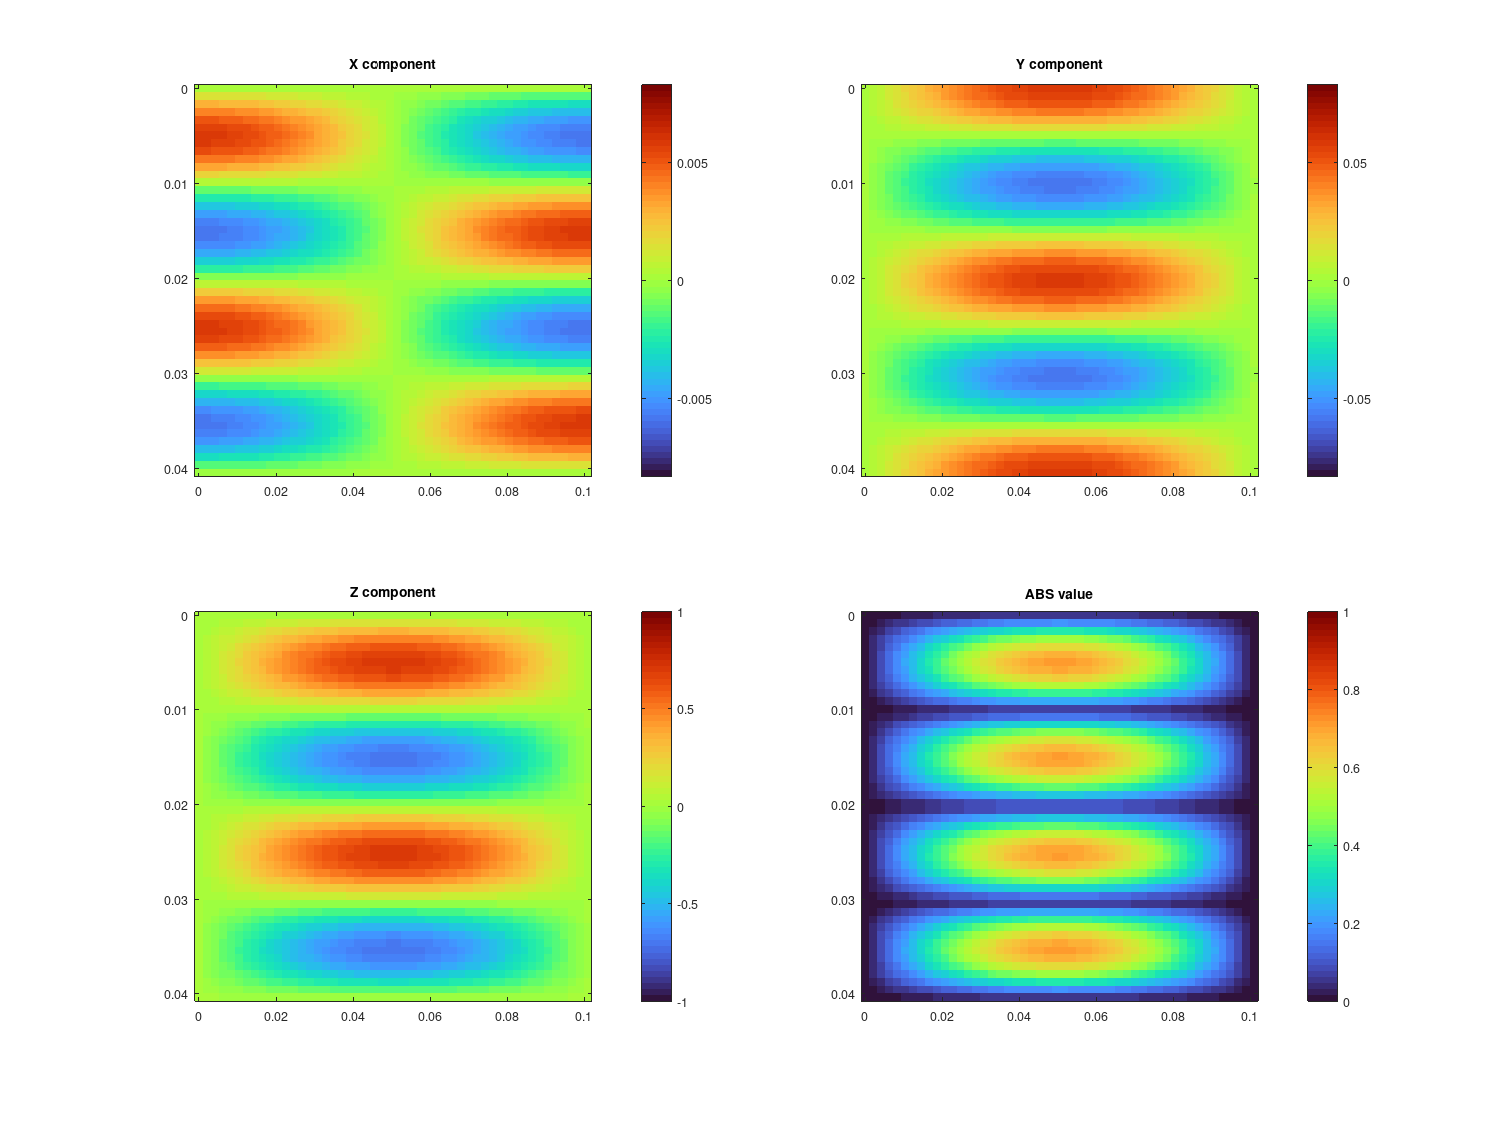

In [3]:
% Phase in the time dimension 
p = pi/4;    # Change it from 0 to 2*pi to see the variation of the E field
% Phase in the z dimension
z = 0;       # Change it from 0 to 2*pi to see the variation of the E field

EX0 = -j*E0*be*m*pi/kc^2/a;
EY0 = -j*E0*be*n*pi/kc^2/b;
EZ0 = E0;

% Phasorial fields
Ex = EX0.*cos((m*pi/a).*X).*sin((n*pi/b).*Y);
Ey = EY0.*sin((m*pi/a).*X).*cos((n*pi/b).*Y);
Ez = EZ0.*sin((m*pi/a).*X).*sin((n*pi/b).*Y);

% Vector fields
Fx = real(Ex.*exp(i*p).*exp(j*be*z));
Fy = real(Ey.*exp(i*p).*exp(j*be*z));
Fz = real(Ez.*exp(i*p).*exp(j*be*z));

F = sqrt(Fx.^2+Fy.^2+Fz.^2);

EX0_ = abs(EX0);
EY0_ = abs(EY0);
EZ0_ = abs(EZ0);

figure("position", [0 0 1200 900])
colormap("turbo");
subplot(2,2,1);
imagesc([0 a],[0 b],Fx,[-EX0_,EX0_]);
colorbar;
title("X component");
subplot(2,2,2);
imagesc([0 a],[0 b],Fy,[-EY0_,EY0_]);
colorbar;
title("Y component");
subplot(2,2,3);
imagesc([0 a],[0 b],Fz,[-EZ0_,EZ0_]);
colorbar;
title("Z component");
subplot(2,2,4);
imagesc([0 a],[0 b],F,[0,E0]);
colorbar;
title("ABS value");

### Frequency dependent properties

Below are reported in a range of $[1.1 \div 2]f_{c(1,4)}$ the main mode properties that are a function of frequency:

* the propagation constant $\beta = 2\pi f \sqrt{\mu \epsilon} \sqrt{1-\left(\frac{f_{c(1,4)}}{f}\right)^2}$

* the group velocity $v_g = c \sqrt{1-\left(\frac{f_{c(1,4)}}{f}\right)^2}$

* the phase velocity $v_f = \frac{c}{\sqrt{1-\left(\frac{f_{c(1,4)}}{f}\right)^2}}$

* the wavelength $\lambda = \frac{2 \pi }{\beta}$

* the modal impedance $Z_{TM} = \frac{\beta}{2 \pi f \epsilon}$

In [4]:
F = linspace(1.1*Fc14, 2*Fc14);
sqrt_f = sqrt(1-(Fc14./F).^2);

be_f = (2*pi*sqrt(mu*e)).*F.*sqrt_f;
vg_f = c.*sqrt_f;
vf_f = c./sqrt_f;
lm_f = (2*pi)./be_f;
zm_f = be_f./(2*pi*e)./F;

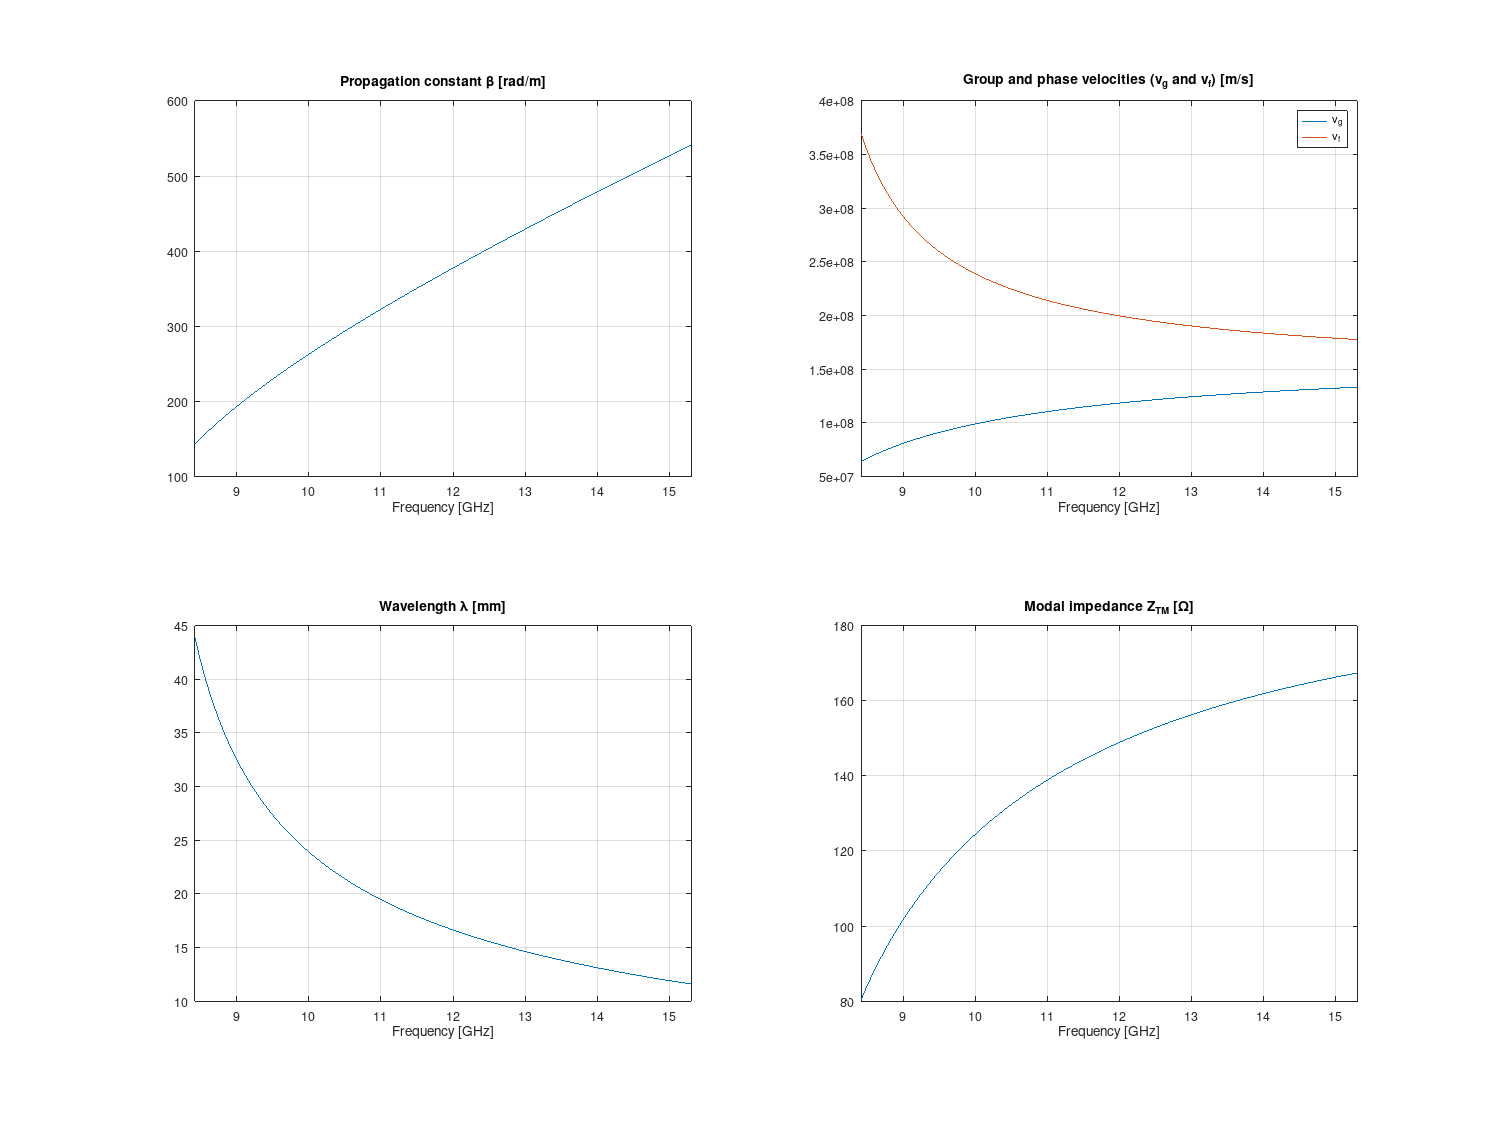

In [5]:
figure("position", [0 0 1200 900])

subplot(2,2,1);
plot(F/1e9, be_f);
title('Propagation constant \beta [rad/m]');
xlabel("Frequency [GHz]");
xlim([1.1*Fc14 2*Fc14]/1e9);
grid on;

subplot(2,2,2);
plot(F/1e9, vg_f, F/1e9, vf_f);
title('Group and phase velocities (v_g and v_f) [m/s]');
xlabel("Frequency [GHz]");
legend('v_g', 'v_f');
xlim([1.1*Fc14 2*Fc14]/1e9);
grid on;

subplot(2,2,3);
plot(F/1e9, lm_f*1e3);
title('Wavelength \lambda [mm]');
xlabel("Frequency [GHz]");
xlim([1.1*Fc14 2*Fc14]/1e9);
grid on;

subplot(2,2,4);
plot(F/1e9, zm_f);
title('Modal impedance Z_{TM} [\Omega]');
xlabel("Frequency [GHz]");
xlim([1.1*Fc14 2*Fc14]/1e9);
grid on;